# Why Seaborn

Provide a layer of abstraction hence simpler to use.

better aesthetics.

more graphs included.

popular

# Seaborn RoadMap

Types of functions 

1). Figure Level. 2). Axis Level.


Main Classification:-

1). Relational Plot.
scatter plot, line plot

2).Distribution plot.
histogram,kdeplot,Rug plot

3).Categorical Variable.
bar plot, count plot, box plot, violin plot, swarm plot

4).Regression Plot.


5).Matrix plot.
Heatmap, cluster map

6).Multiplots.
joint plot, pair plot. JointGrid, PairGrid


# About Seaborn:
In seaborn the same func plot the two different graphs. and this is beacause it has figure level object and axis level object.

# RELATIONAL PLOT
To see the statistical realtionship between the two or more variables.
Bivariate analysis.

1).Plots Under this section:

Scatter plot 

Line plot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

# Scatter Plot 

In [3]:
tips_data = sns.load_dataset('tips')
tips_data.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

<Axes: xlabel='total_bill', ylabel='tip'>

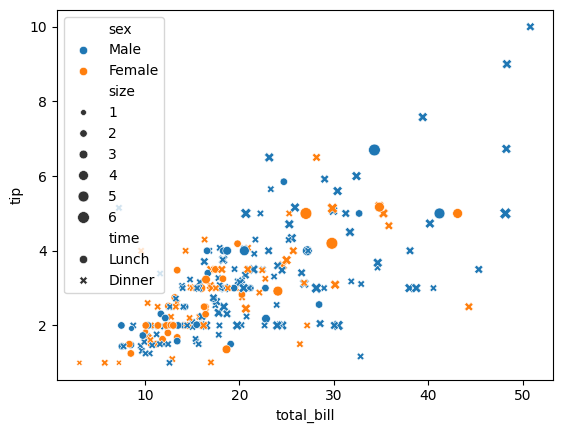

In [3]:
#scatterplot -- axis level function
sns.scatterplot(data = tips_data,x='total_bill',y='tip',hue='sex',style='time',size='size')

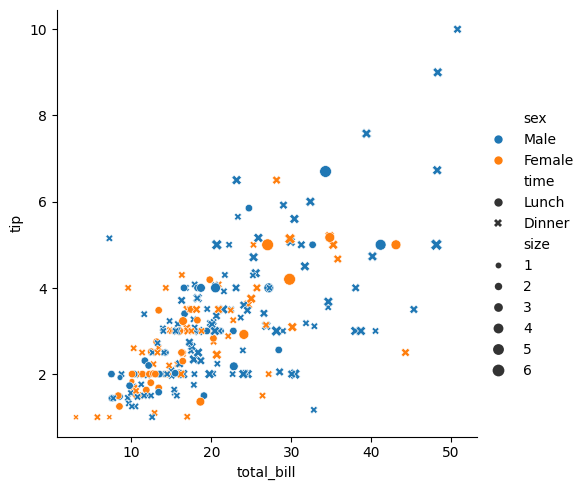

In [4]:
# relplot -- figure level func
sns.relplot(data = tips_data,x='total_bill',y='tip',kind='scatter',hue="sex",style='time',size='size')

# LINE PLOT

In [4]:
gap_data = px.data.gapminder()
india_data = gap_data[gap_data['country']=='India']

<Axes: xlabel='year', ylabel='lifeExp'>

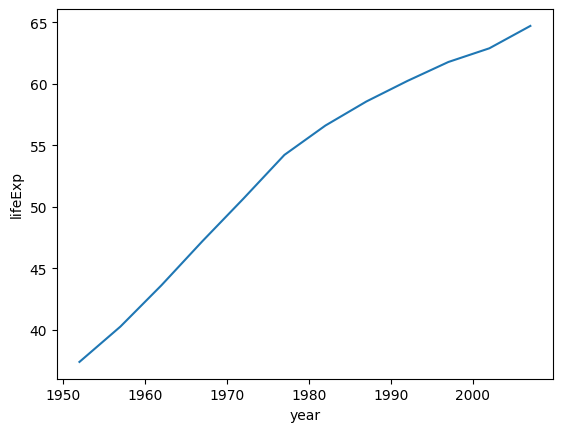

In [6]:
# axis level function 
sns.lineplot(data=india_data,x='year',y='lifeExp')

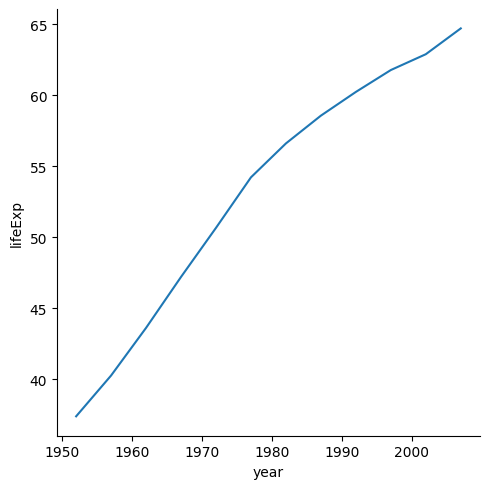

In [7]:
# figure level function
sns.relplot(data=india_data,x='year',y='lifeExp',kind='line')

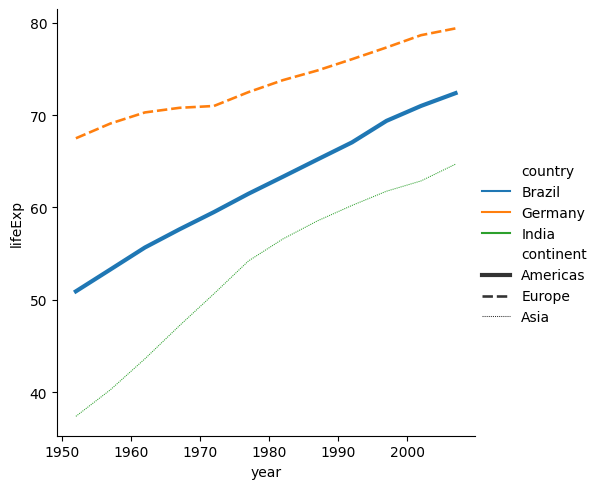

In [8]:
# figure level func
country_data = gap_data[gap_data['country'].isin(['India','Brazil','Germany'])]
sns.relplot(data=country_data,x='year',y='lifeExp',kind='line',hue='country',style='continent',size='continent')

<Axes: xlabel='year', ylabel='lifeExp'>

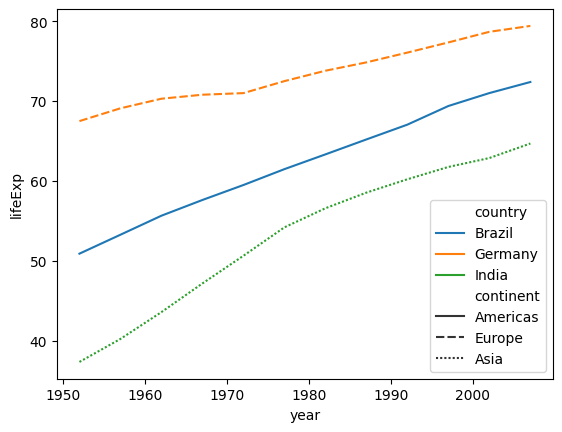

In [9]:
# axis level func
sns.lineplot(data=country_data,x='year',y='lifeExp',hue='country',style='continent')

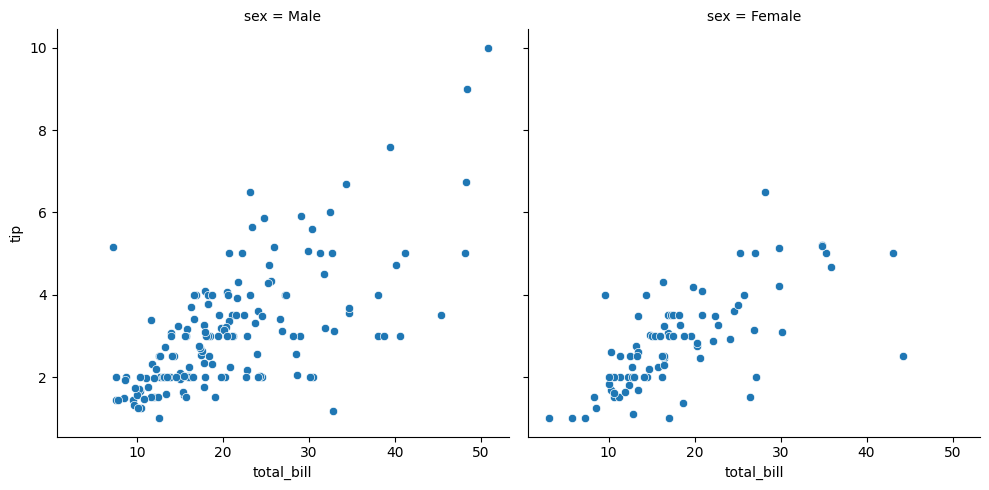

In [10]:
#facet Plot-- It always work with figure level functions.It will work with relplot , 
# it will not work with scatterplot and line plot. 
sns.relplot(data=tips_data,x='total_bill',y='tip',kind='scatter',col='sex')

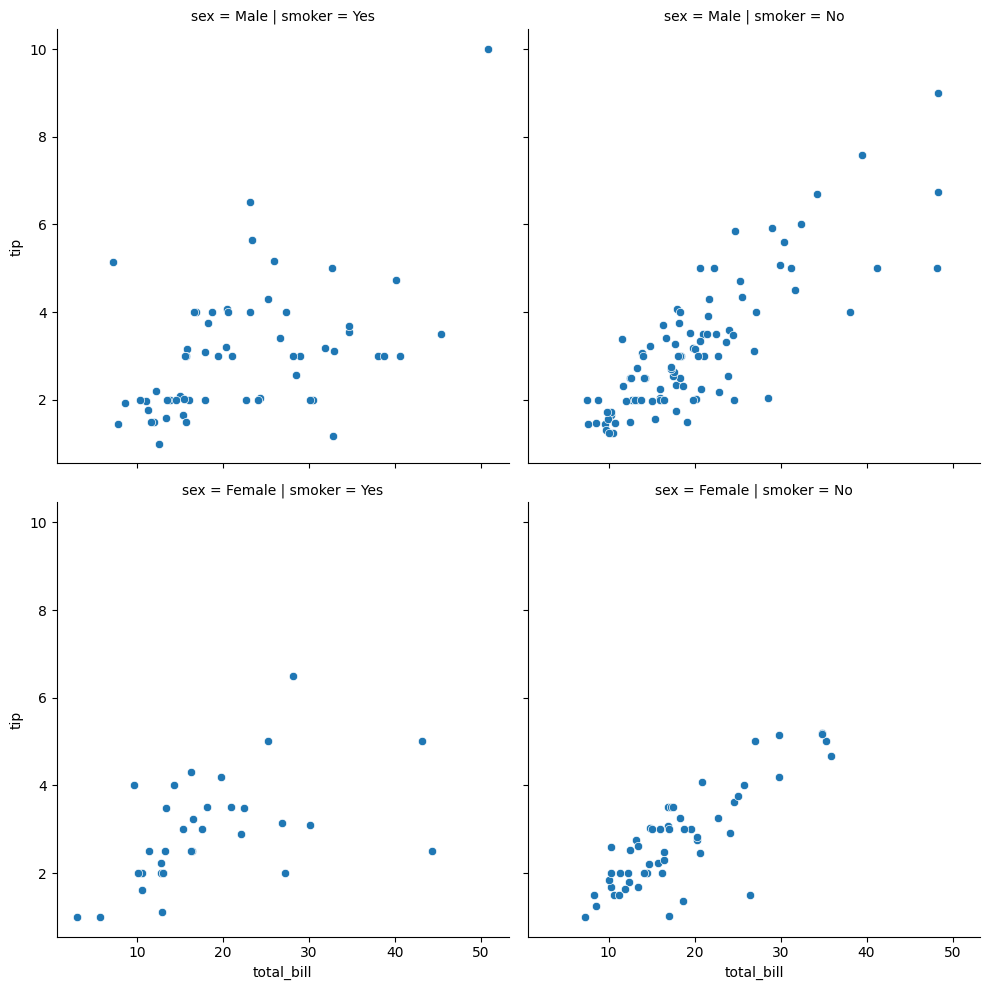

In [11]:
#facet Plot -- only
sns.relplot(data=tips_data,x='total_bill',y='tip',kind='scatter',col='smoker',row='sex')

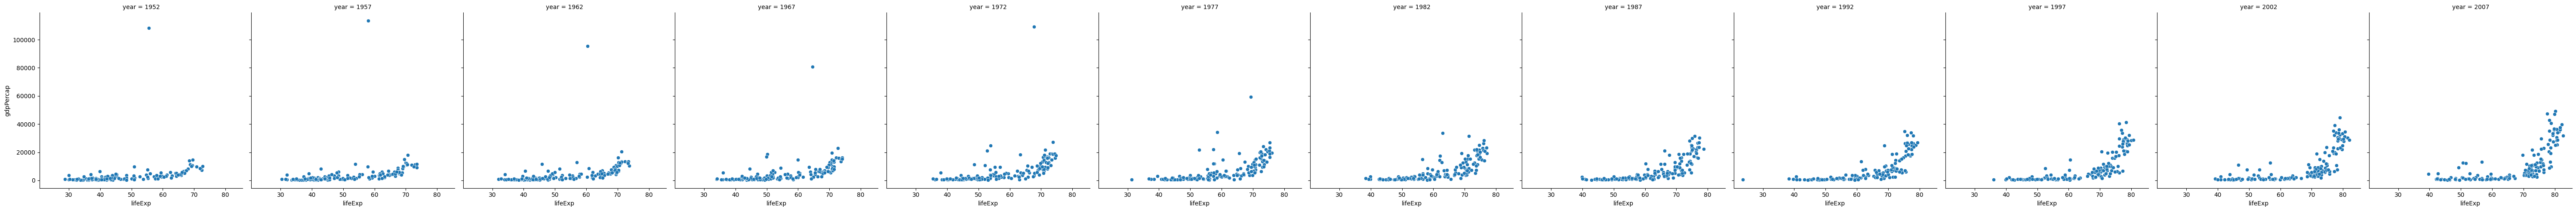

In [12]:
sns.relplot(data=gap_data,x='lifeExp',y='gdpPercap',kind='scatter',col='year')

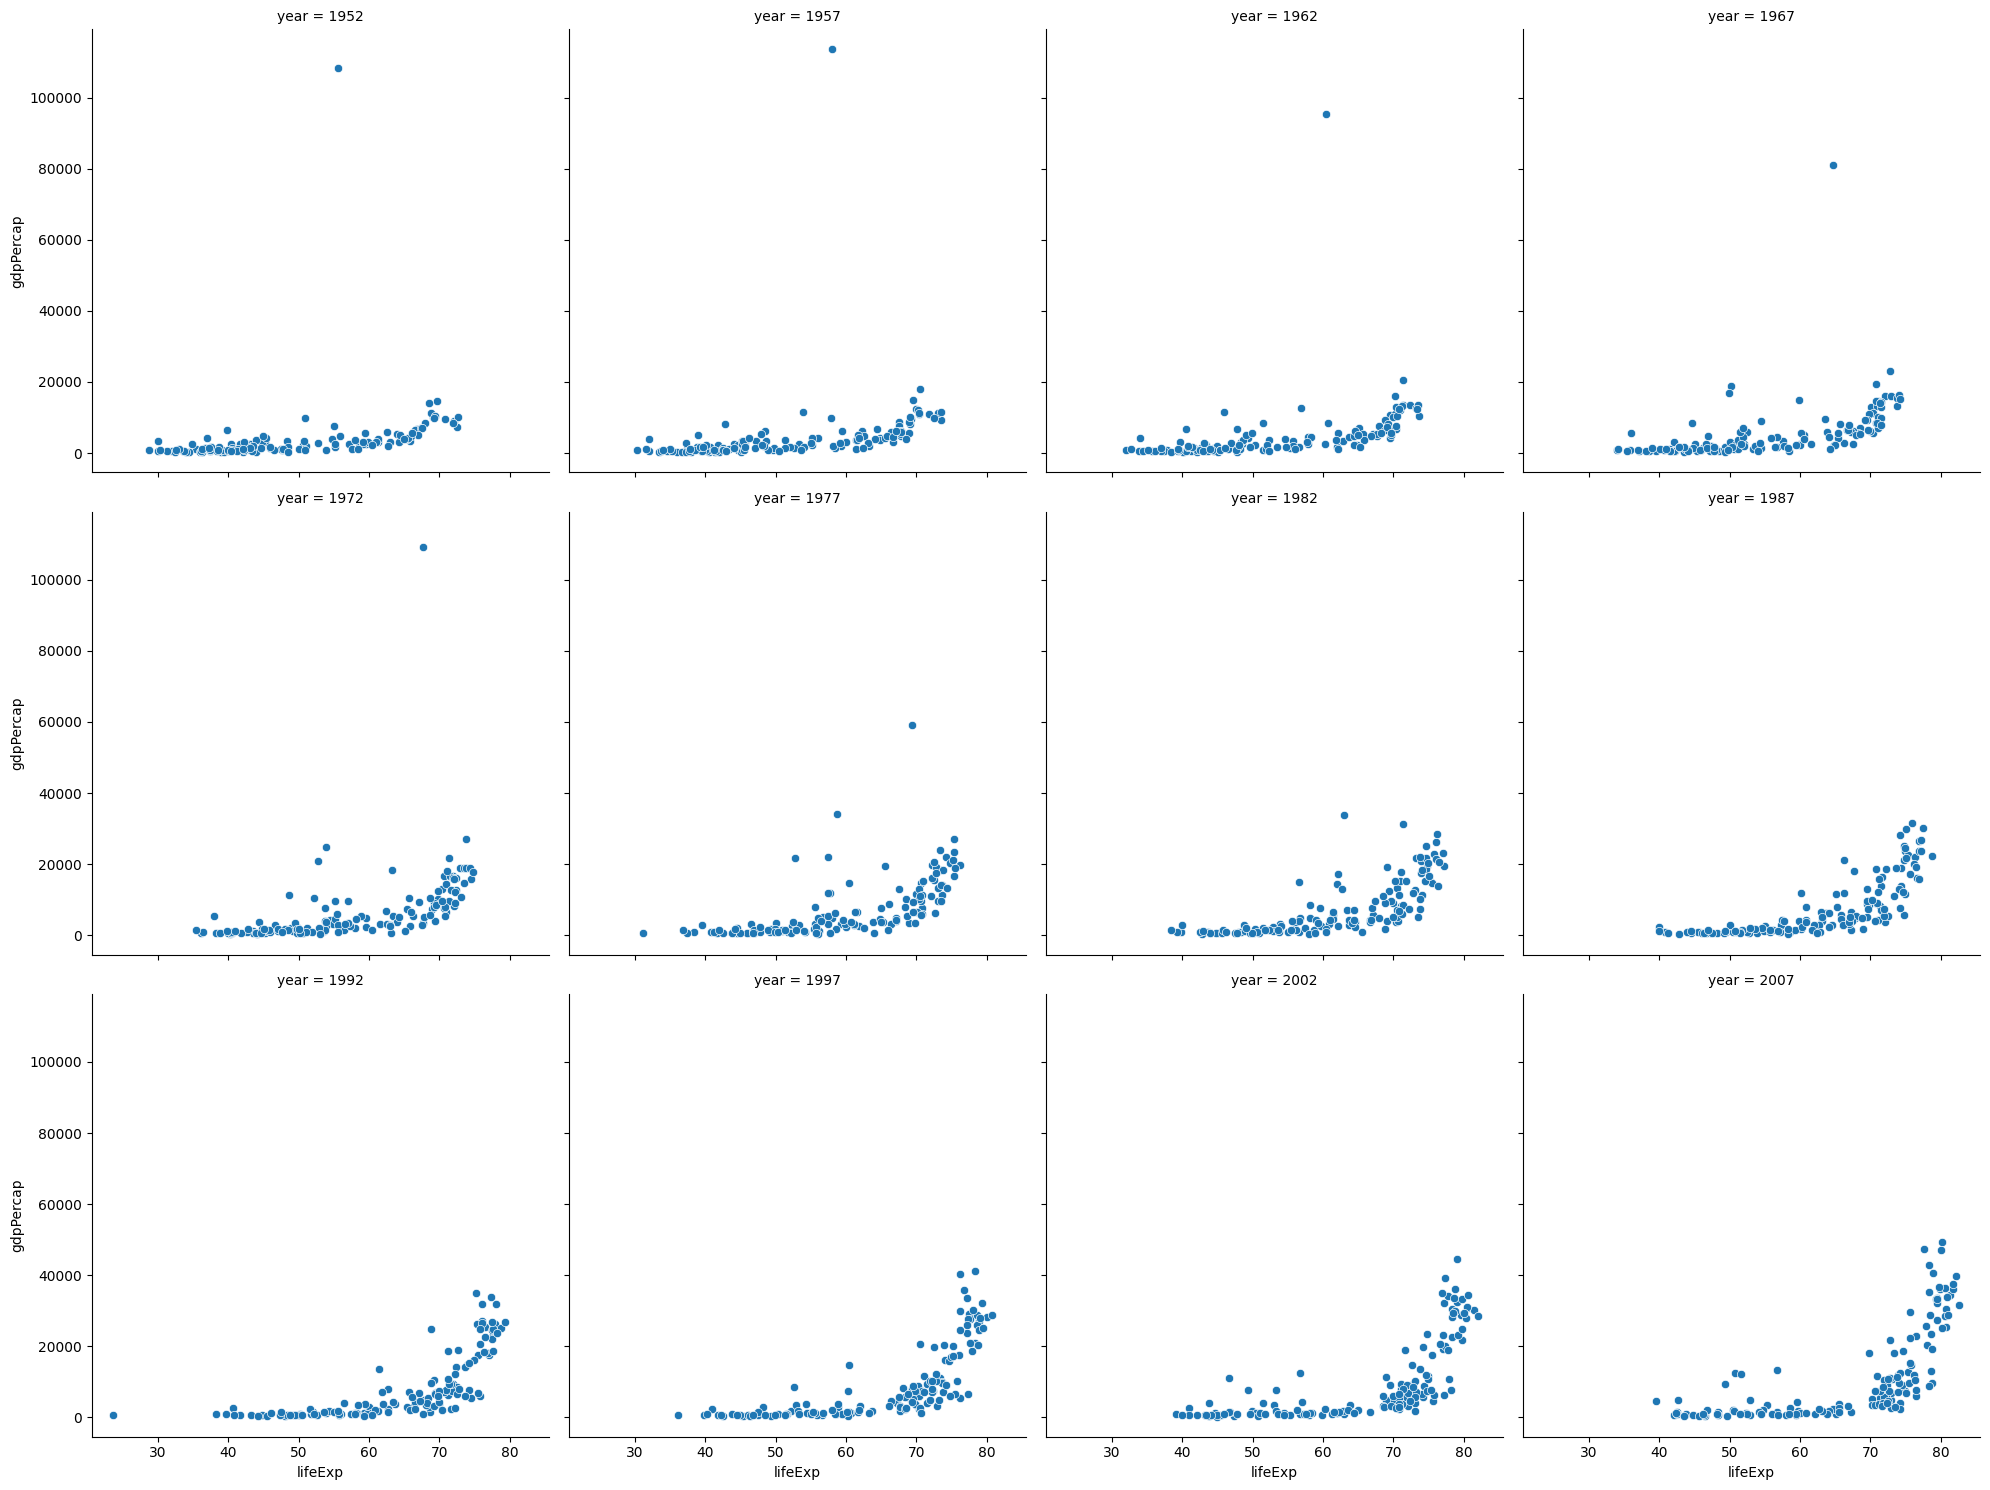

In [13]:
# col_wrap
sns.relplot(data=gap_data,x='lifeExp',y='gdpPercap',kind='scatter',col='year',col_wrap=4)

# DISTRIBUTION PLOT

used for univariate analysis
used to find out the distribution
range of the observation
Central tendency 

is data is bimodal?? bimodal means multiple peaks in the data.

are there outliers?? Data points lies outside the normal distribution.

Plots are under distribution plot.

histplot

kdeplot

rugplot.

In [14]:
# figure level func -- displot
# axes level func -- histplot --> kdeplot --> rugplot

<Axes: xlabel='total_bill', ylabel='Count'>

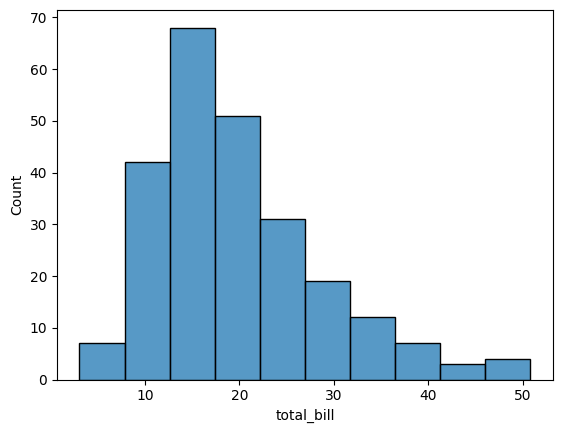

In [15]:
# plotting univariate histograms
sns.histplot(data=tips_data,x='total_bill',bins=10)

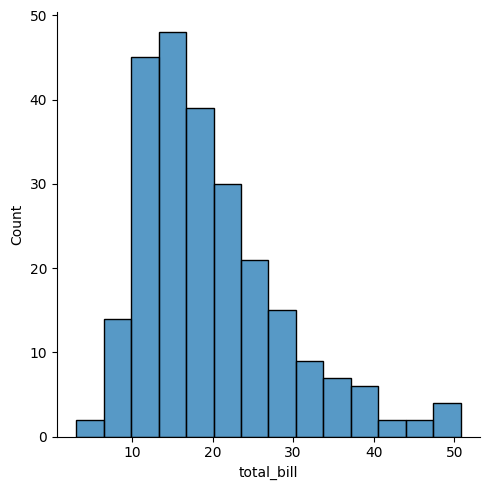

In [16]:
sns.displot(data=tips_data,x='total_bill',kind='hist')

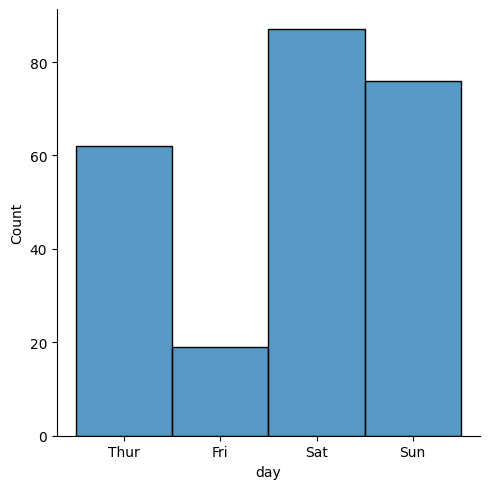

In [17]:
# It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram. 
# Discrete bins are automatically set for categorical variables.

#count plot
sns.displot(data=tips_data,x='day',kind='hist')

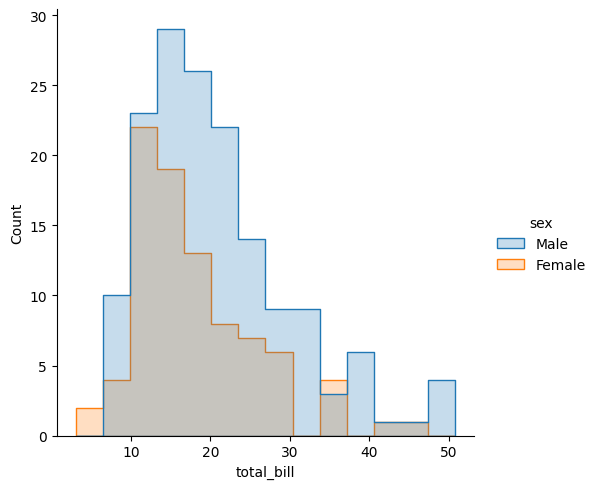

In [6]:
sns.displot(data=tips_data,x='total_bill',kind='hist',hue='sex',element = 'step')

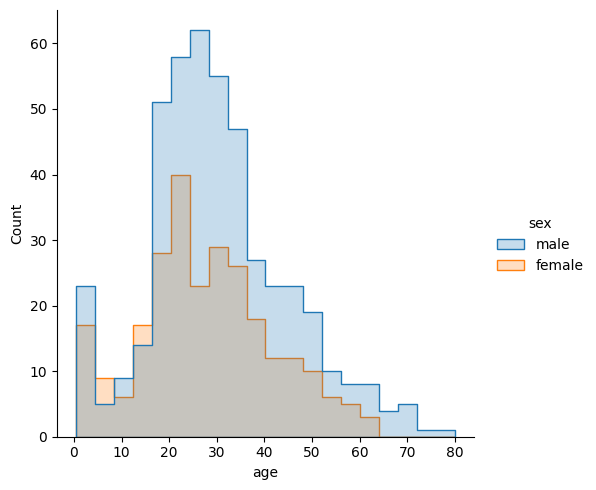

In [19]:
titanic_dataset = sns.load_dataset('titanic')
sns.displot(data=titanic_dataset,x ='age',kind='hist',element='step',hue='sex')

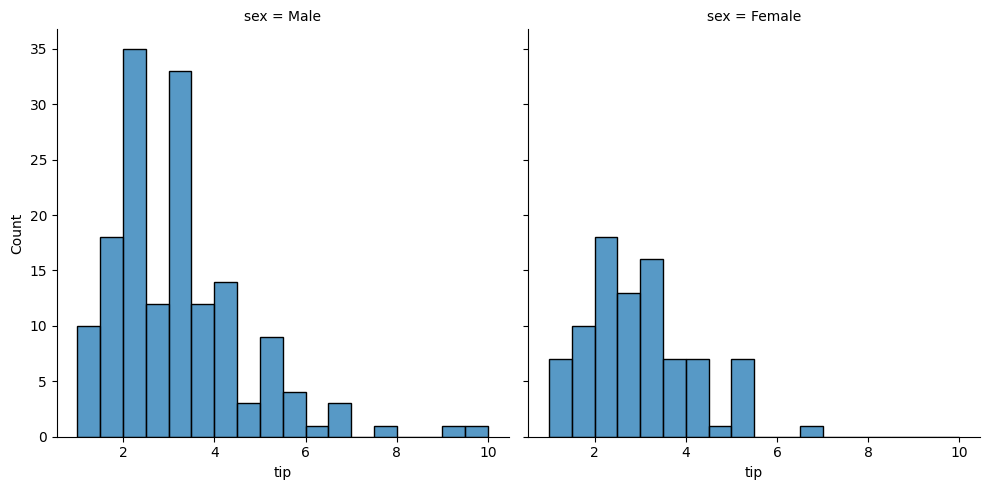

In [11]:
#faceting using row and col . this facet does'nt work with the axis level func(histplot)
sns.displot(data=tips_data,x='tip',col='sex',kind='hist')

In [21]:
# kdeplot
# Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel,
# producing a continuous density estimate

<Axes: xlabel='total_bill', ylabel='Density'>

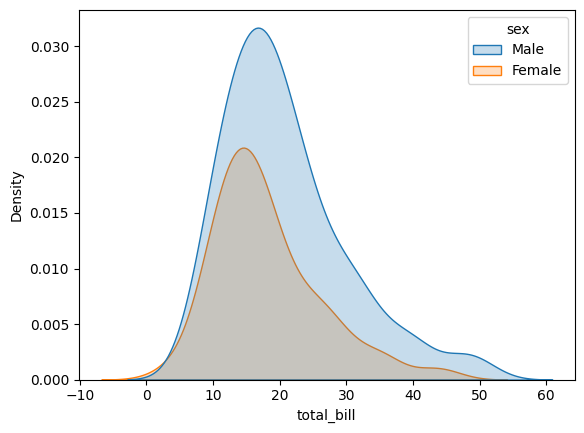

In [14]:
# yaxis represent the density of prob in your data.
sns.kdeplot(data = tips_data,x='total_bill',hue='sex',fill=True)

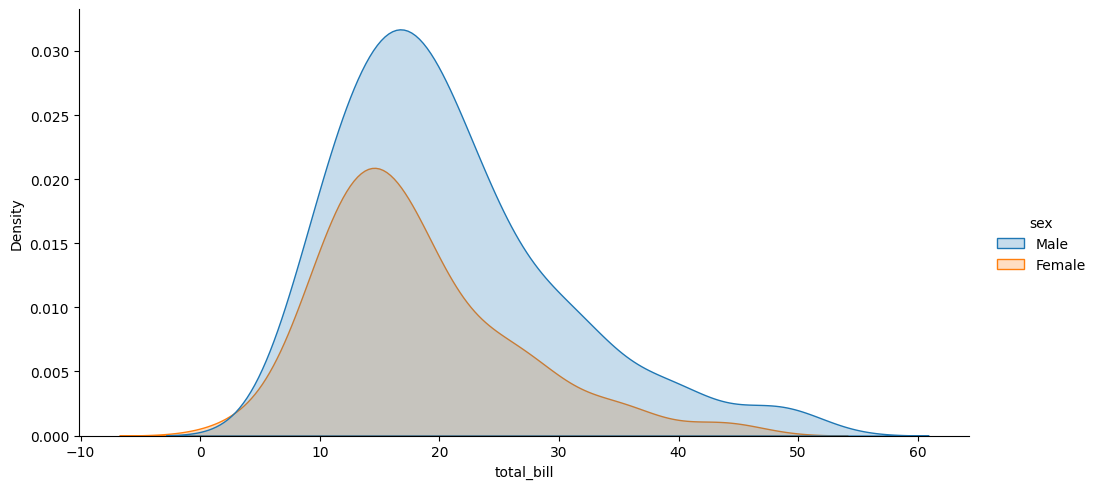

In [23]:
sns.displot(kind = 'kde',data = tips_data,x='total_bill',hue='sex',fill=True,height = 5,aspect= 2)

<Axes: xlabel='total_bill', ylabel='Density'>

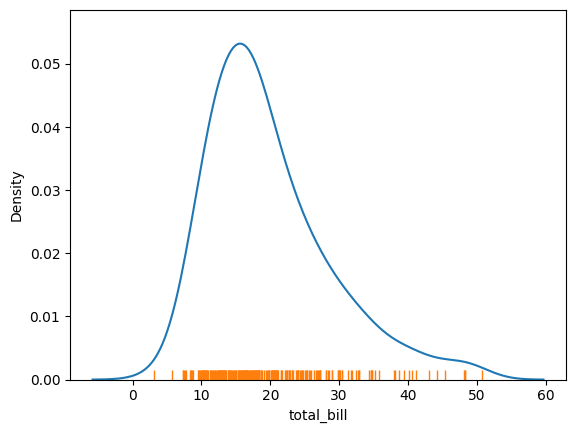

In [24]:
# Rugplot
# Plot marginal distributions by drawing ticks along the x and y axes.

# This function is intended to complement other plots by showing 
# the location of individual observations in an unobtrusive way.
sns.kdeplot(data = tips_data,x='total_bill')
sns.rugplot(data = tips_data,x='total_bill')

<Axes: xlabel='total_bill', ylabel='tip'>

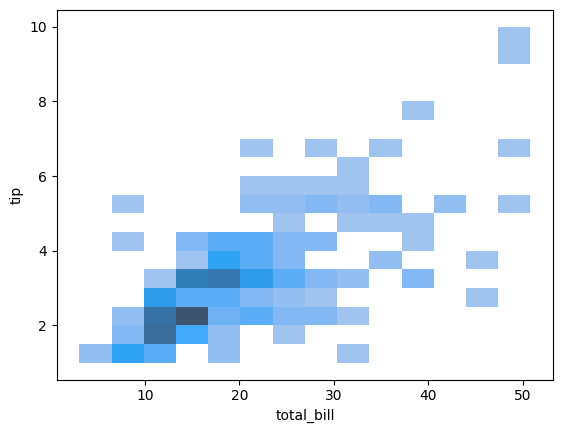

In [25]:
# Bivariate histogram
# A bivariate histogram bins the data within rectangles that tile the plot 
# and then shows the count of observations within each rectangle with the fill color.

sns.histplot(data=tips_data,x='total_bill',y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

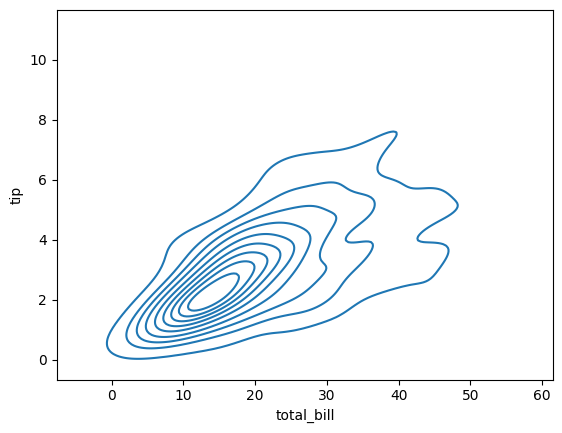

In [26]:
# Bivariate Kdeplot
# a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian
sns.kdeplot(data = tips_data,x='total_bill',y='tip')

# MATRIX PLOT 

1). Heat Map 

2). Cluster Map

<Axes: xlabel='year', ylabel='country'>

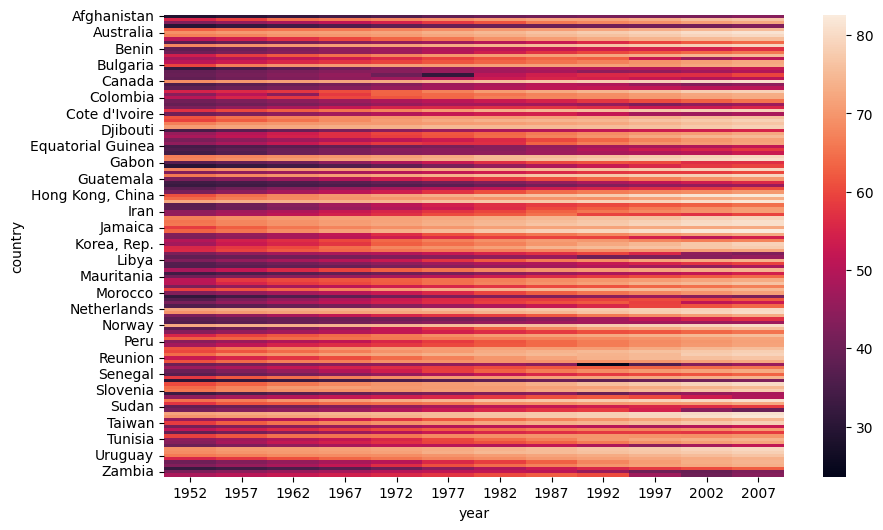

In [27]:
# Heatmap 
# plot the reactangluar data as a color encoded matrix
heatmap_data = gap_data.pivot(index='country',columns ='year',values='lifeExp')
# axis level func
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data)

<Axes: xlabel='year', ylabel='country'>

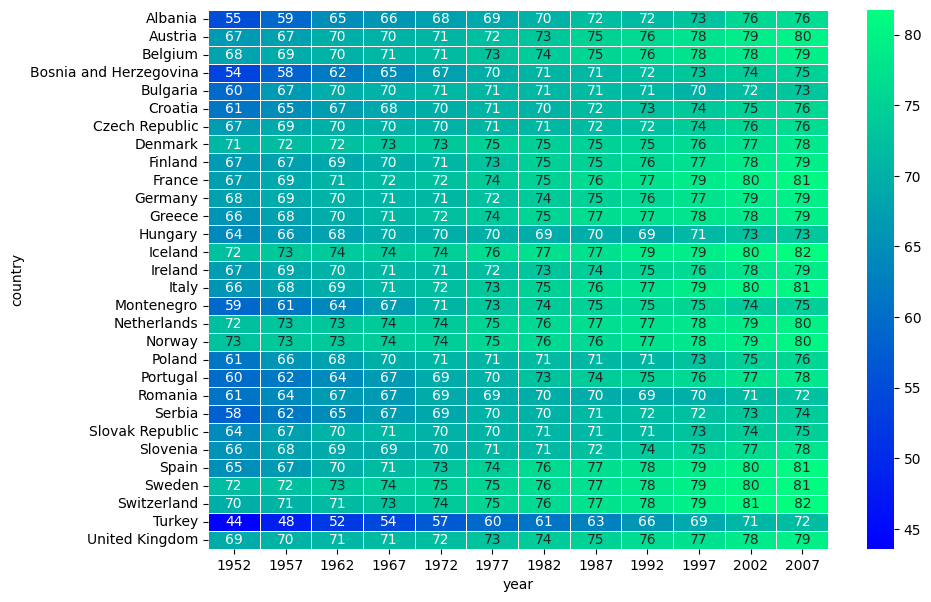

In [28]:
temp_df = gap_data[gap_data['continent']=='Europe'].pivot(index='country',columns ='year',values='lifeExp')
plt.figure(figsize=(10,7))
sns.heatmap(temp_df,annot=True,cmap='winter',linewidth=0.5)

In [29]:
# Clustermap  -- clustering means it will patch up the similar columns together and dismiliar columns ko alag kr deta h.
# Plot a matrix dataset as a hierarchically-clustered heatmap.
# This function requires scipy to be available.
iris_data = px.data.iris()

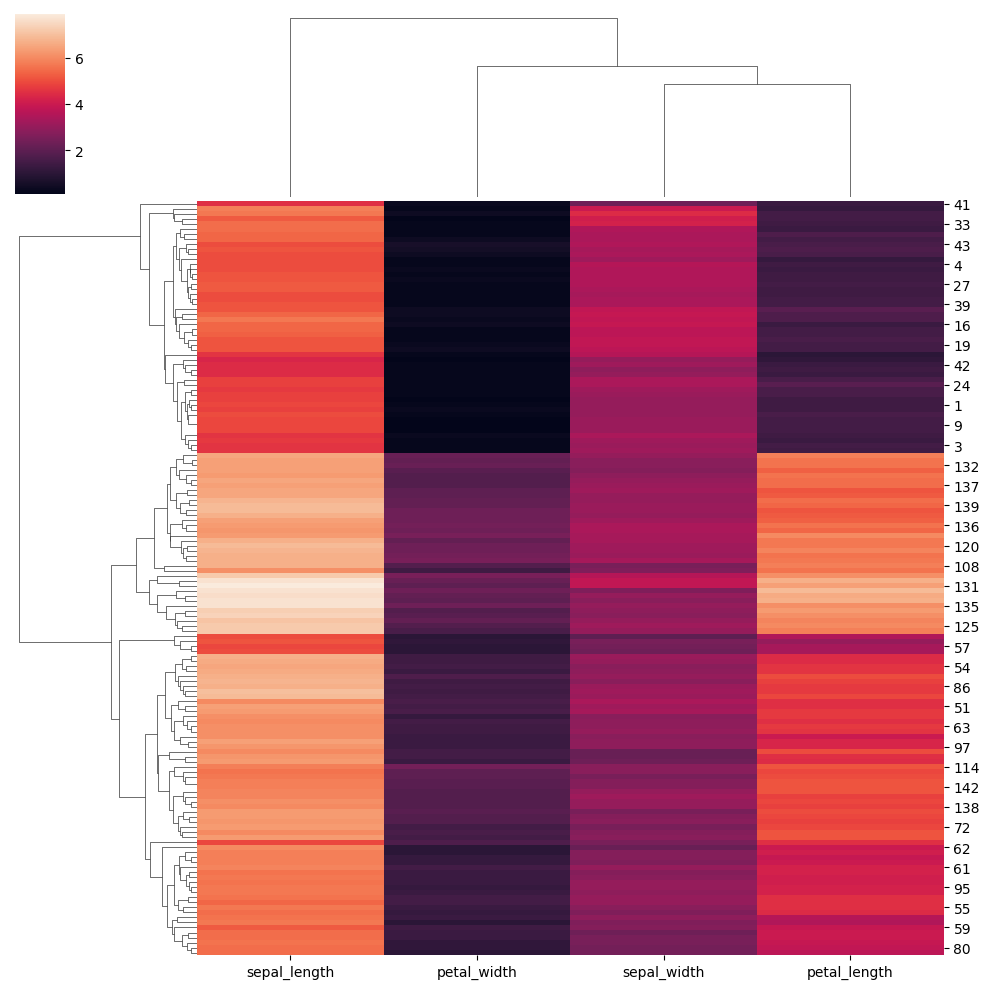

In [30]:
sns.clustermap(iris_data.iloc[:,[0,1,2,3]])

# Categorical Plots


# Categorical Scatter Plot

1). Strip Plot

2). Swarm plot


# Categorical Distribution Plot

1). box plot

2). violin plot

# Categorical Estimate Plot

1). Bar plot

2). count plot

3). Point Plot

In [31]:
iris_data.head(2)

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1

In [32]:
tips_data.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

<Axes: xlabel='total_bill', ylabel='tip'>

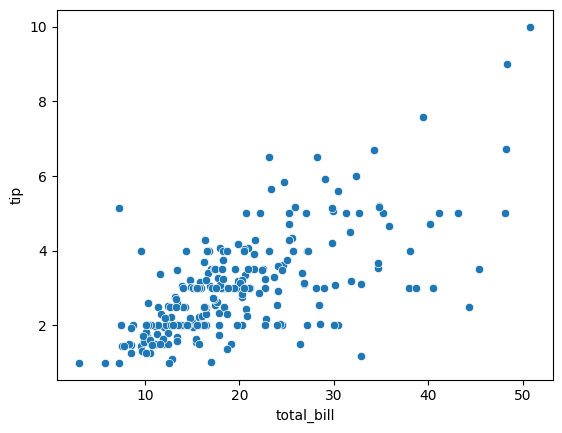

In [33]:
sns.scatterplot(data=tips_data,x= 'total_bill',y='tip')

<Axes: xlabel='day', ylabel='total_bill'>

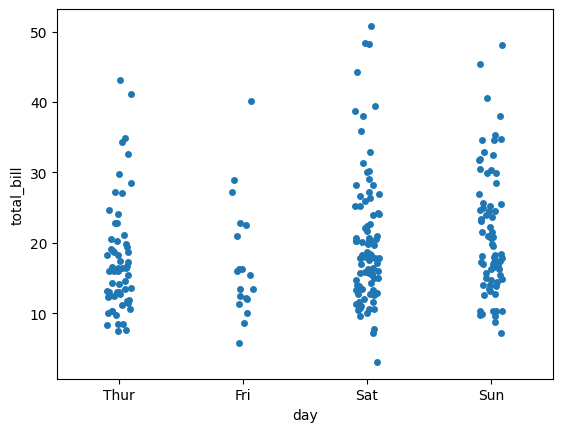

In [34]:
# strip plot -- it will plot the data one on categorical variable and other on numerical variable.
# stripplot is a axis level func
sns.stripplot(data=tips_data,x='day',y='total_bill')

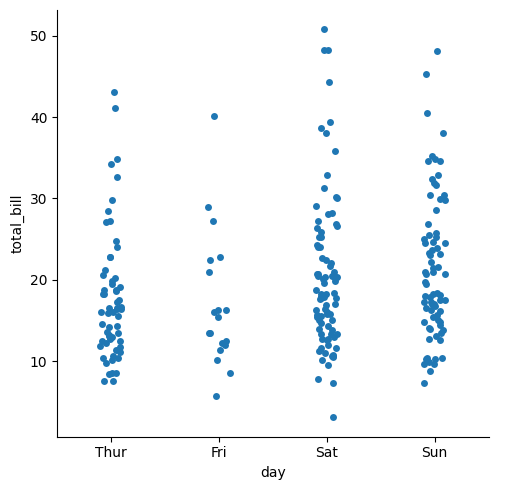

In [35]:
# using Catplot.
# its a figure level func.
sns.catplot(data=tips_data,x='day',y='total_bill',kind='strip')

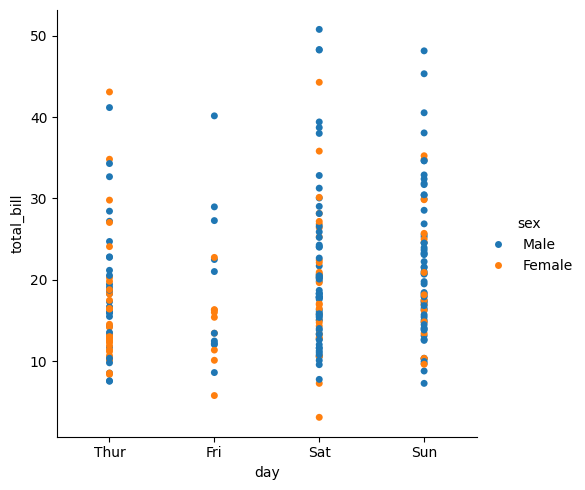

In [71]:
sns.catplot(data=tips_data,x='day',y='total_bill',kind='strip',jitter=0,hue='sex')

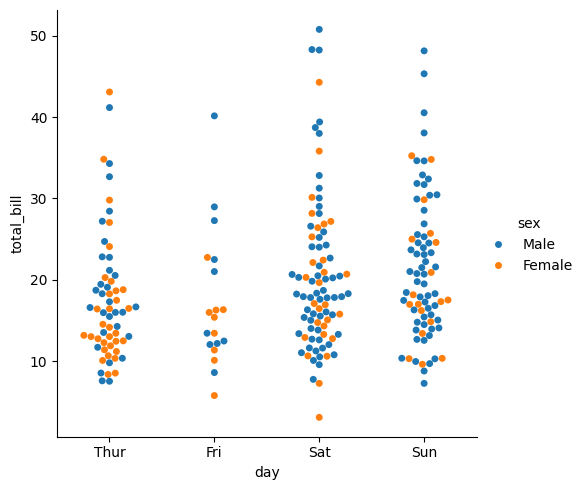

In [37]:
# Swarm plot
# figure level func.
sns.catplot(data=tips_data,x='day',y='total_bill',kind='swarm',hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

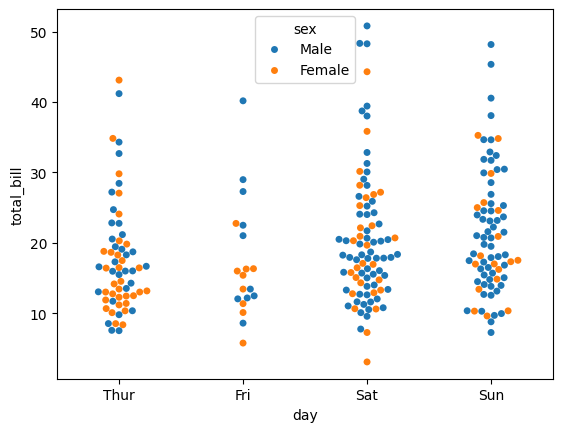

In [38]:
# axis level parameter
sns.swarmplot(data=tips_data,x='day',y='total_bill',hue='sex')

# BOX PLOT

A boxplot is a standardized way of displaying the distribution of data based 
on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). 
It can tell you about your outliers and what their values are. 
Boxplots can also tell you if your data is symmetrical, 
how tightly your data is grouped and if and how your data is skewed.

<Axes: xlabel='sex', ylabel='total_bill'>

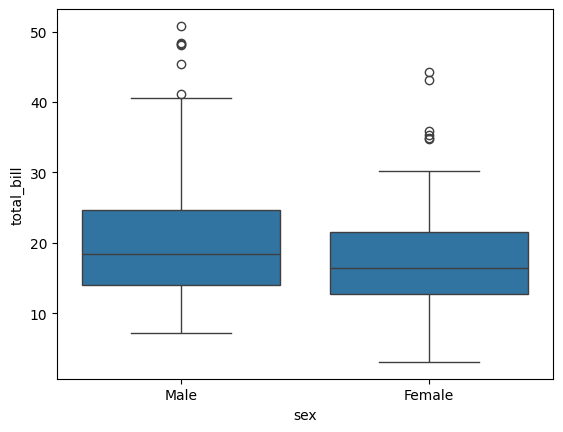

In [39]:
# Box plot
# axis level func
sns.boxplot(data=tips_data,x='sex',y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

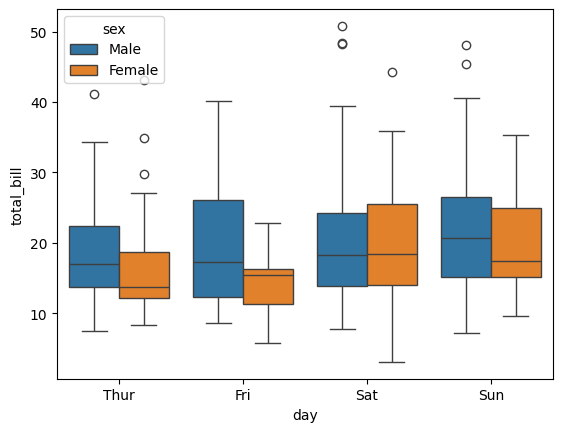

In [40]:
sns.boxplot(data=tips_data,x='day',y='total_bill',hue='sex')

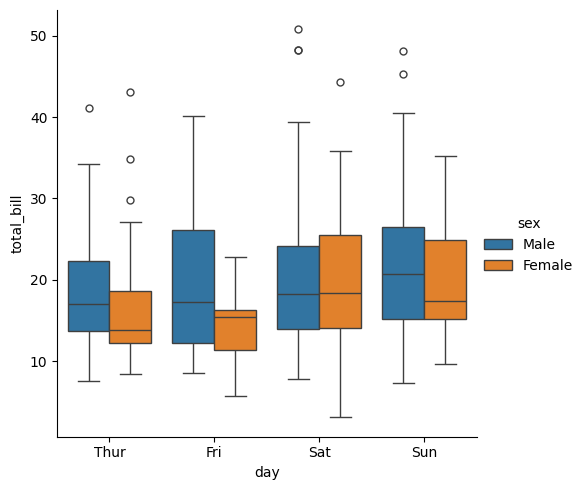

In [41]:
# Figure level func
sns.catplot(data=tips_data ,x='day',y='total_bill',kind='box',hue='sex')

<Axes: ylabel='total_bill'>

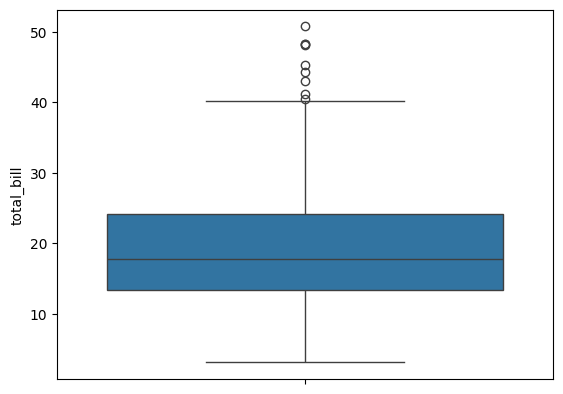

In [42]:
sns.boxplot(data=tips_data,y='total_bill')

# Violin Plot: - 
(Box plot + Kde plot)

<Axes: xlabel='day', ylabel='total_bill'>

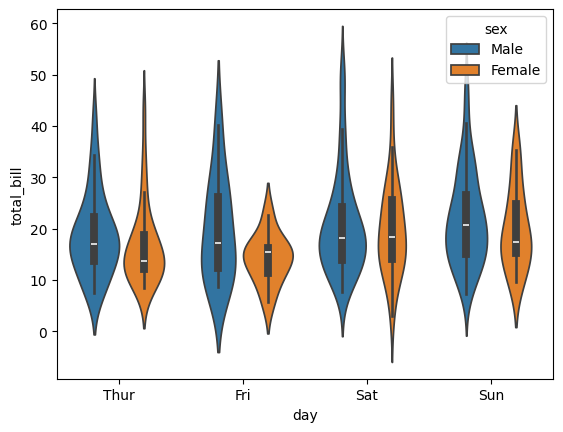

In [43]:
sns.violinplot(data=tips_data,x='day',y='total_bill',hue='sex')

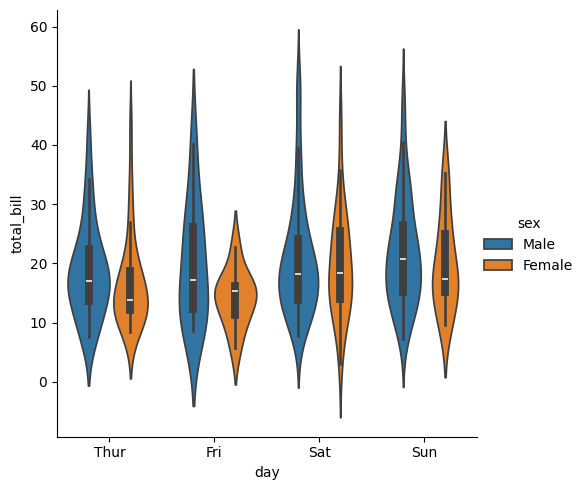

In [44]:
sns.catplot(kind='violin',data=tips_data,x='day',y='total_bill',hue='sex')

# Bar Plot

<Axes: xlabel='sex', ylabel='total_bill'>

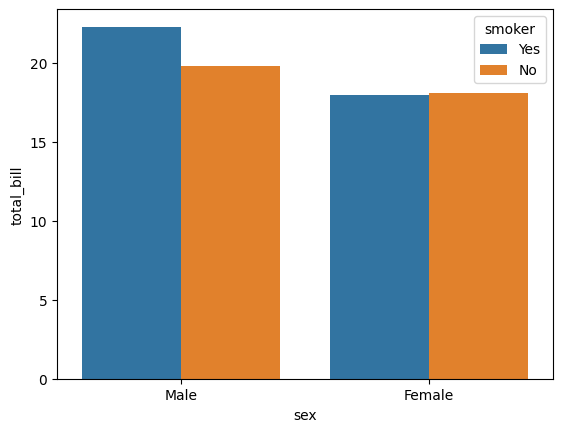

In [45]:
# axis level func.
# When there are multiple observations in each category, 
# it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars
sns.barplot(data=tips_data,x='sex',y='total_bill',errorbar=None,hue='smoker')

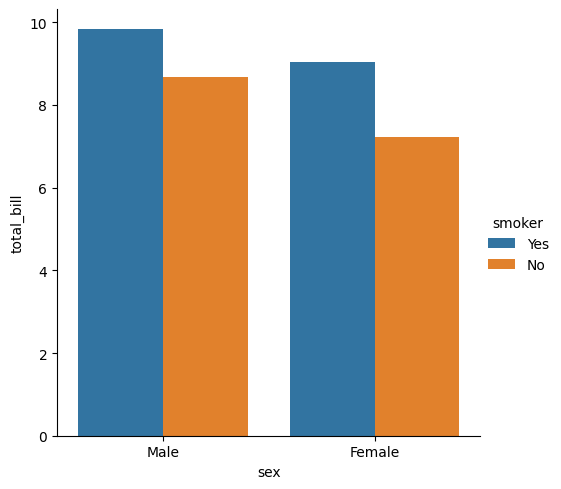

In [73]:
sns.catplot(kind='bar',data=tips_data,x='sex',y='total_bill',hue='smoker',estimator=np.std,errorbar=None)

# Point Plot 

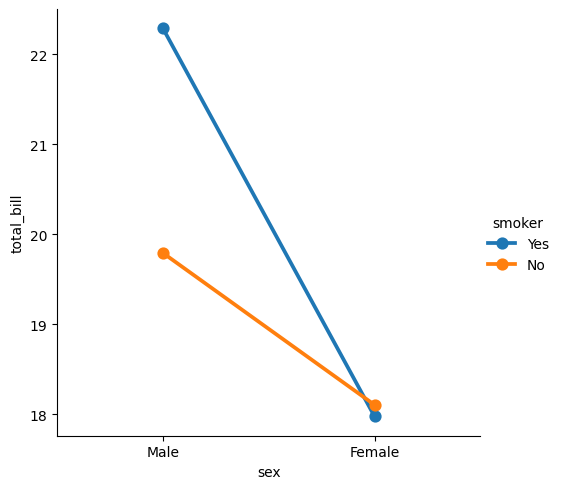

In [47]:
sns.catplot(kind='point',data=tips_data,x='sex',y='total_bill',hue='smoker',estimator=np.mean,errorbar=None)  # 

<Axes: xlabel='sex', ylabel='total_bill'>

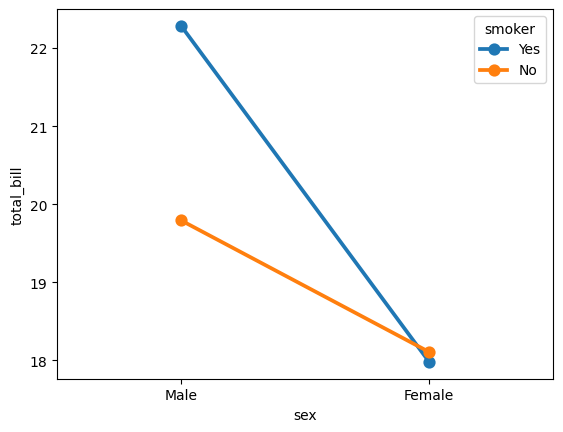

In [48]:
sns.pointplot(data=tips_data,x='sex',y='total_bill',hue='smoker',estimator=np.mean,errorbar=None)

<Axes: xlabel='sex', ylabel='count'>

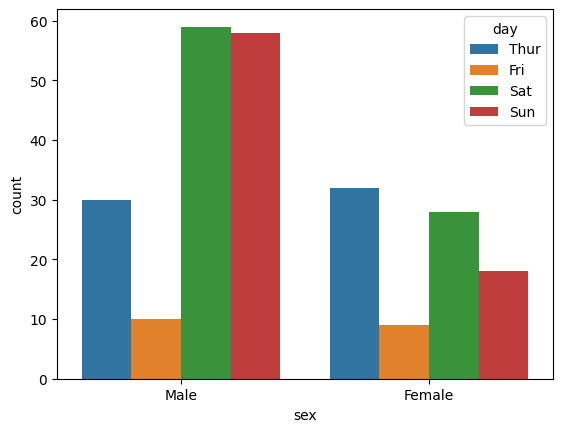

In [49]:
# Count Plot
# A special case for the bar plot is when you want to show the number of observations 
# in each category rather than computing a statistic for a second variable. 
# This is similar to a histogram over a categorical, rather than quantitative, variable
sns.countplot(data=tips_data,x='sex',hue='day')

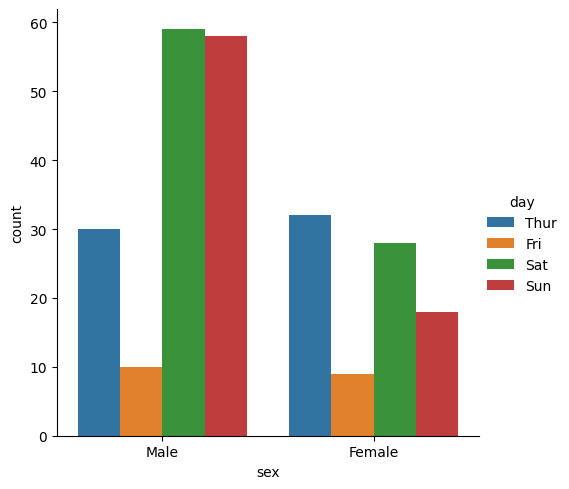

In [50]:
sns.catplot(kind='count',data=tips_data,x='sex',hue='day')

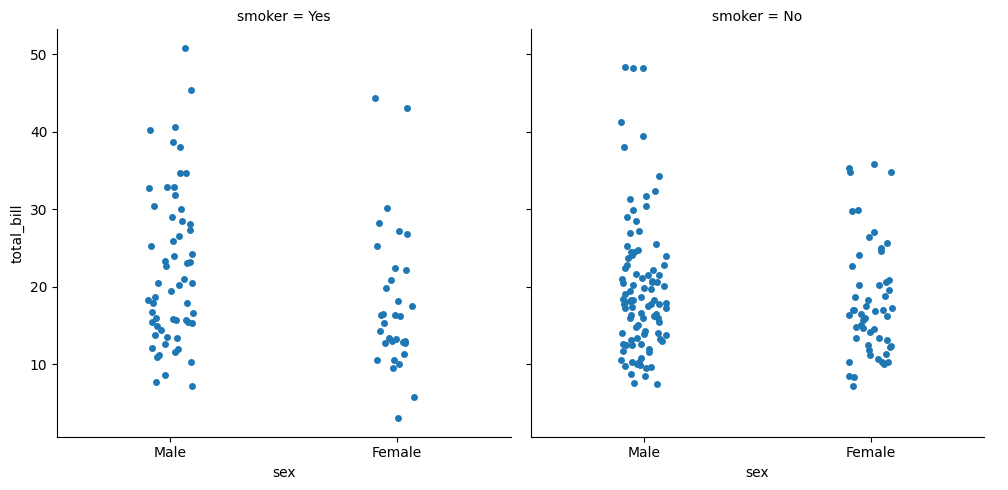

In [51]:
# faceting
sns.catplot(data=tips_data,x='sex',y='total_bill',col='smoker')

# Regression Plot 
In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

Regplot

lmplot

<Axes: xlabel='total_bill', ylabel='tip'>

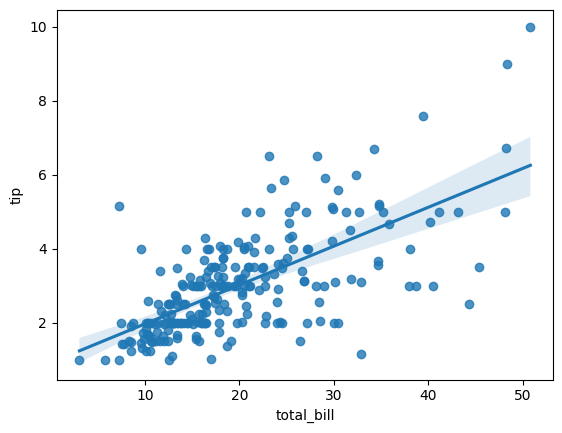

In [16]:
# axis level func.
# Hue parameter is not here.
# axis level func.
sns.regplot(data=tips_data,x='total_bill',y='tip')

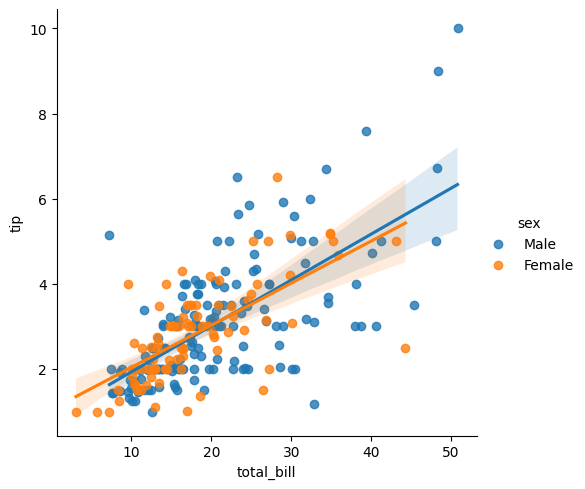

In [53]:
# figure level func
sns.lmplot(data=tips_data,x='total_bill',y='tip',hue='sex')

<Axes: xlabel='total_bill', ylabel='tip'>

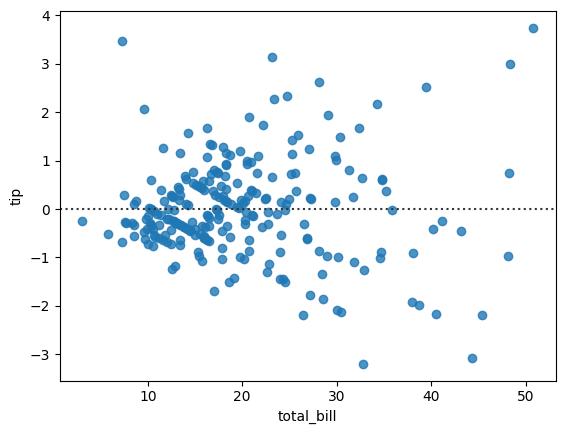

In [54]:
# residplot -- residual plot
sns.residplot(data=tips_data,x='total_bill',y='tip')

# MULTIGIRD PLOT

1). Facet Grid

2). Multi Grid

3). Joint Grid

# A second way to plot the Facet Plot -- FacetGrid

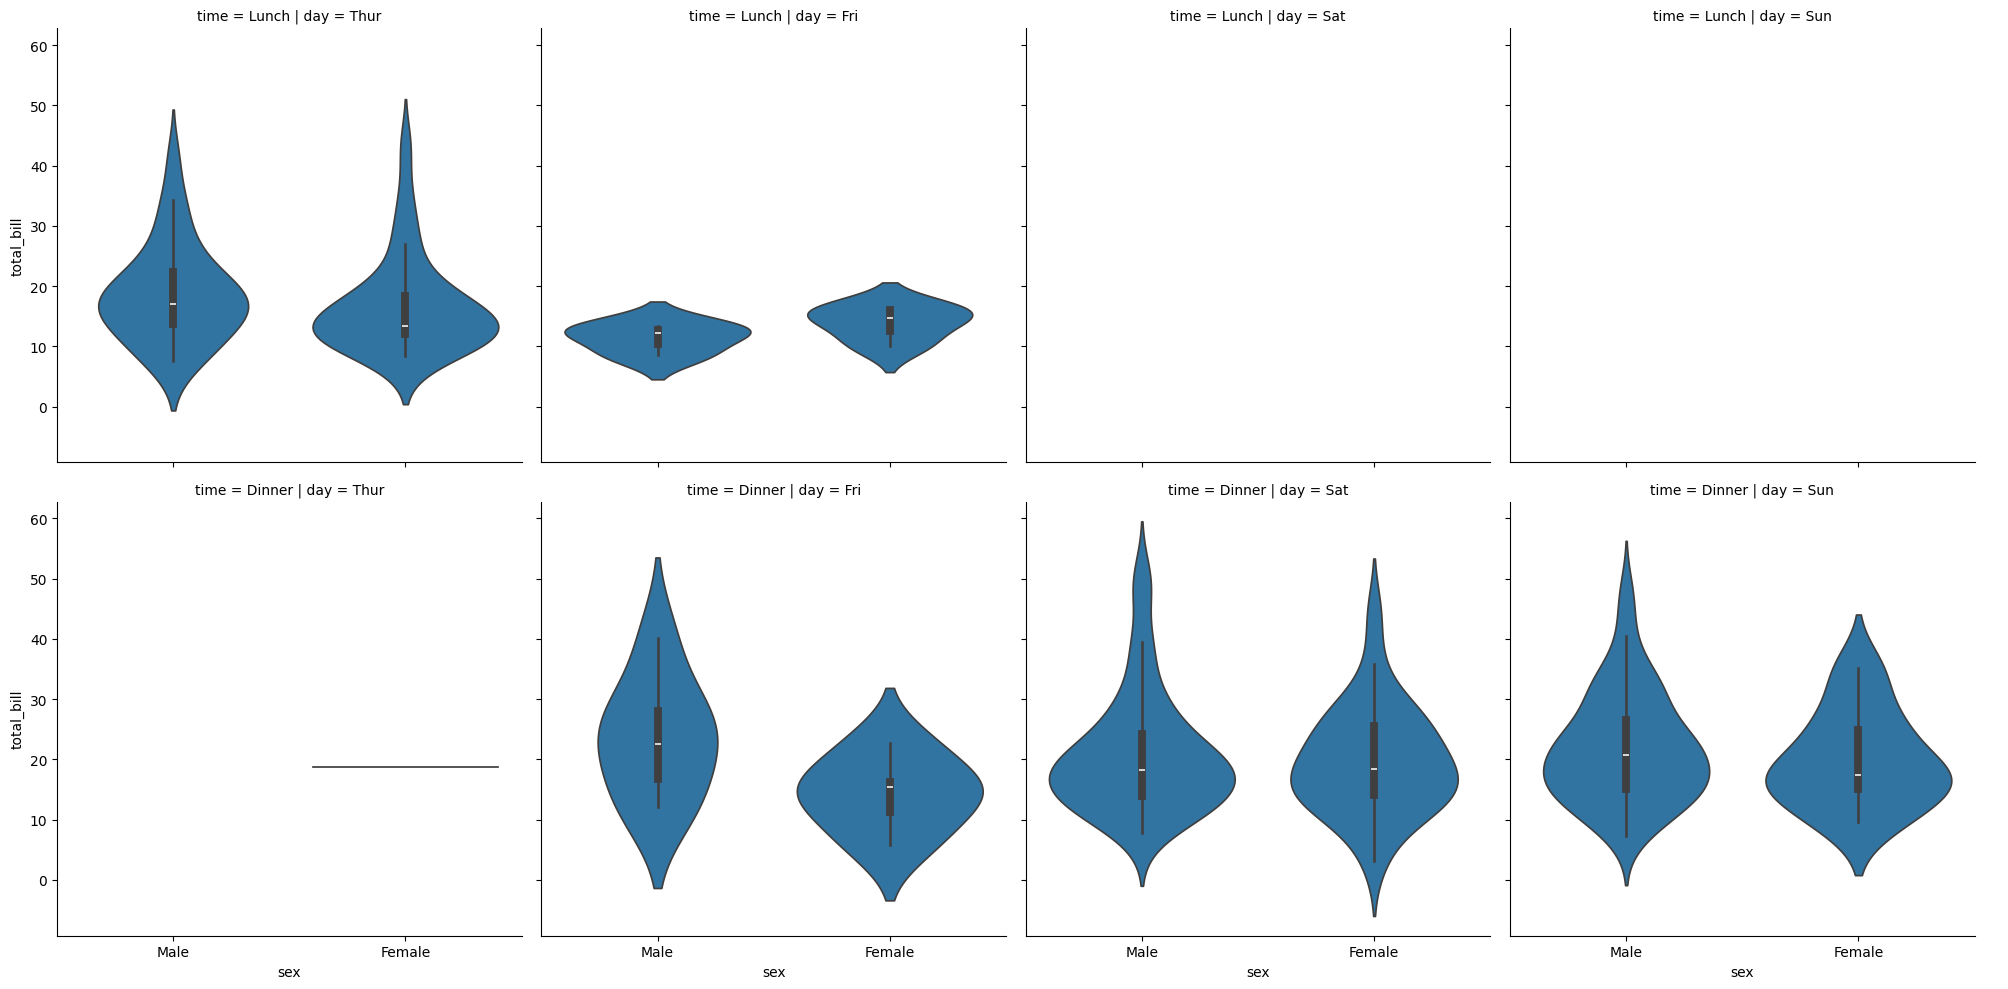

In [55]:
# figure level func 
# relplot --> displot --> catplot --> lmplot
sns.catplot(data=tips_data,x='sex',y='total_bill',kind='violin',col='day',row='time')

C:\Users\sasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


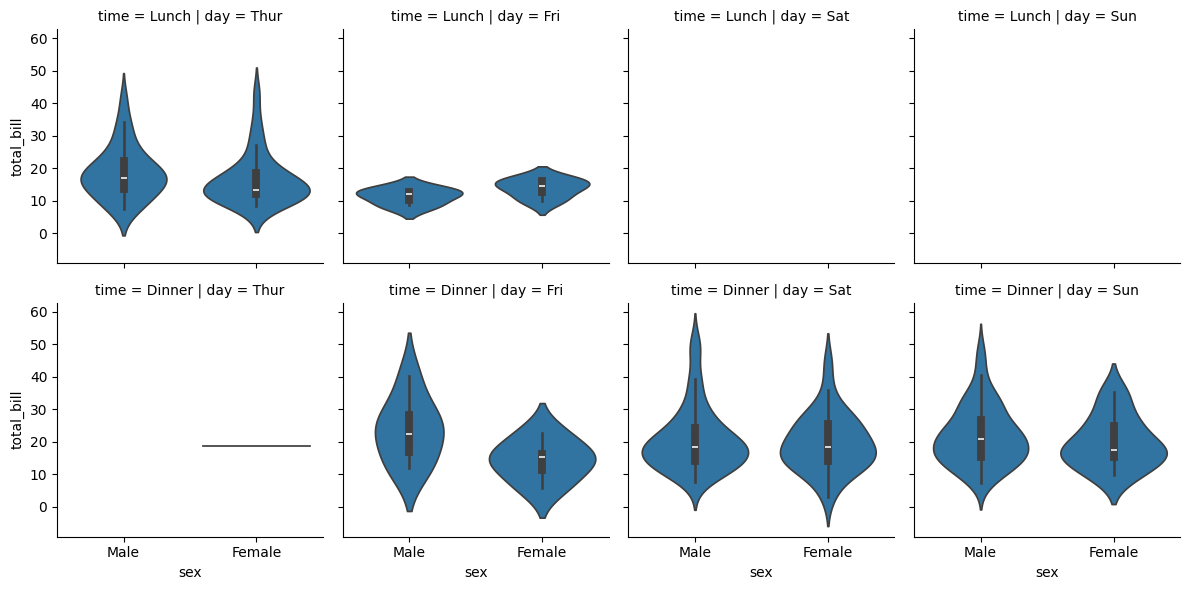

In [56]:
g = sns.FacetGrid(data=tips_data,col='day',row='time')
g.map(sns.violinplot,'sex','total_bill')

C:\Users\sasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


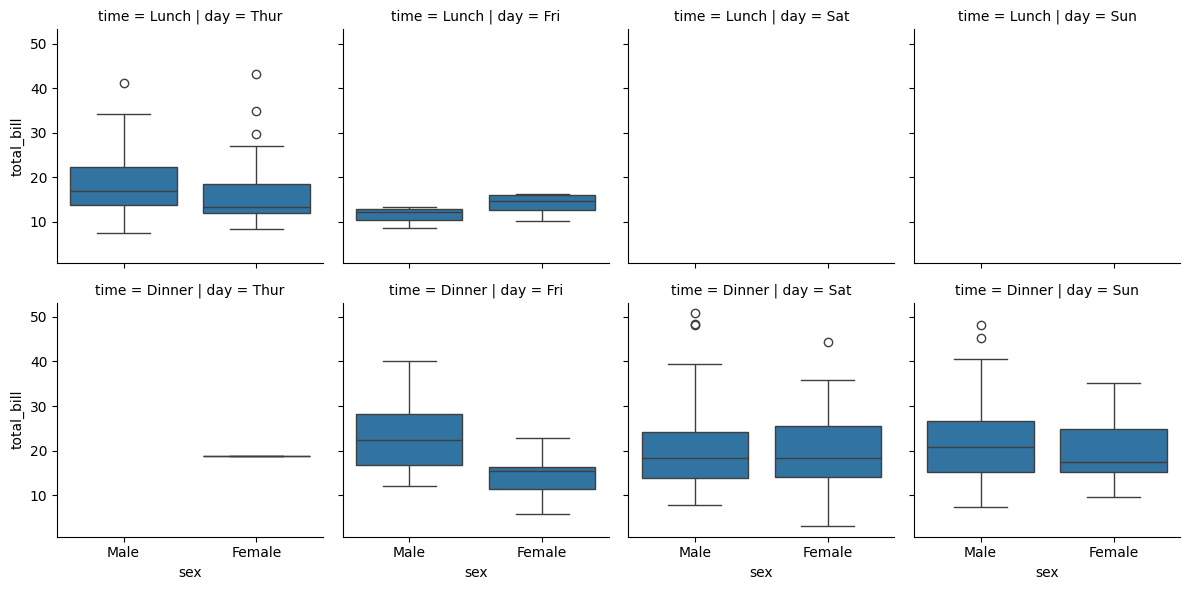

In [57]:
g = sns.FacetGrid(data=tips_data,col='day',row='time')
g.map(sns.boxplot,'sex','total_bill')

# Plotting Pairwise Relationship(PairPlot VS PairGrid)

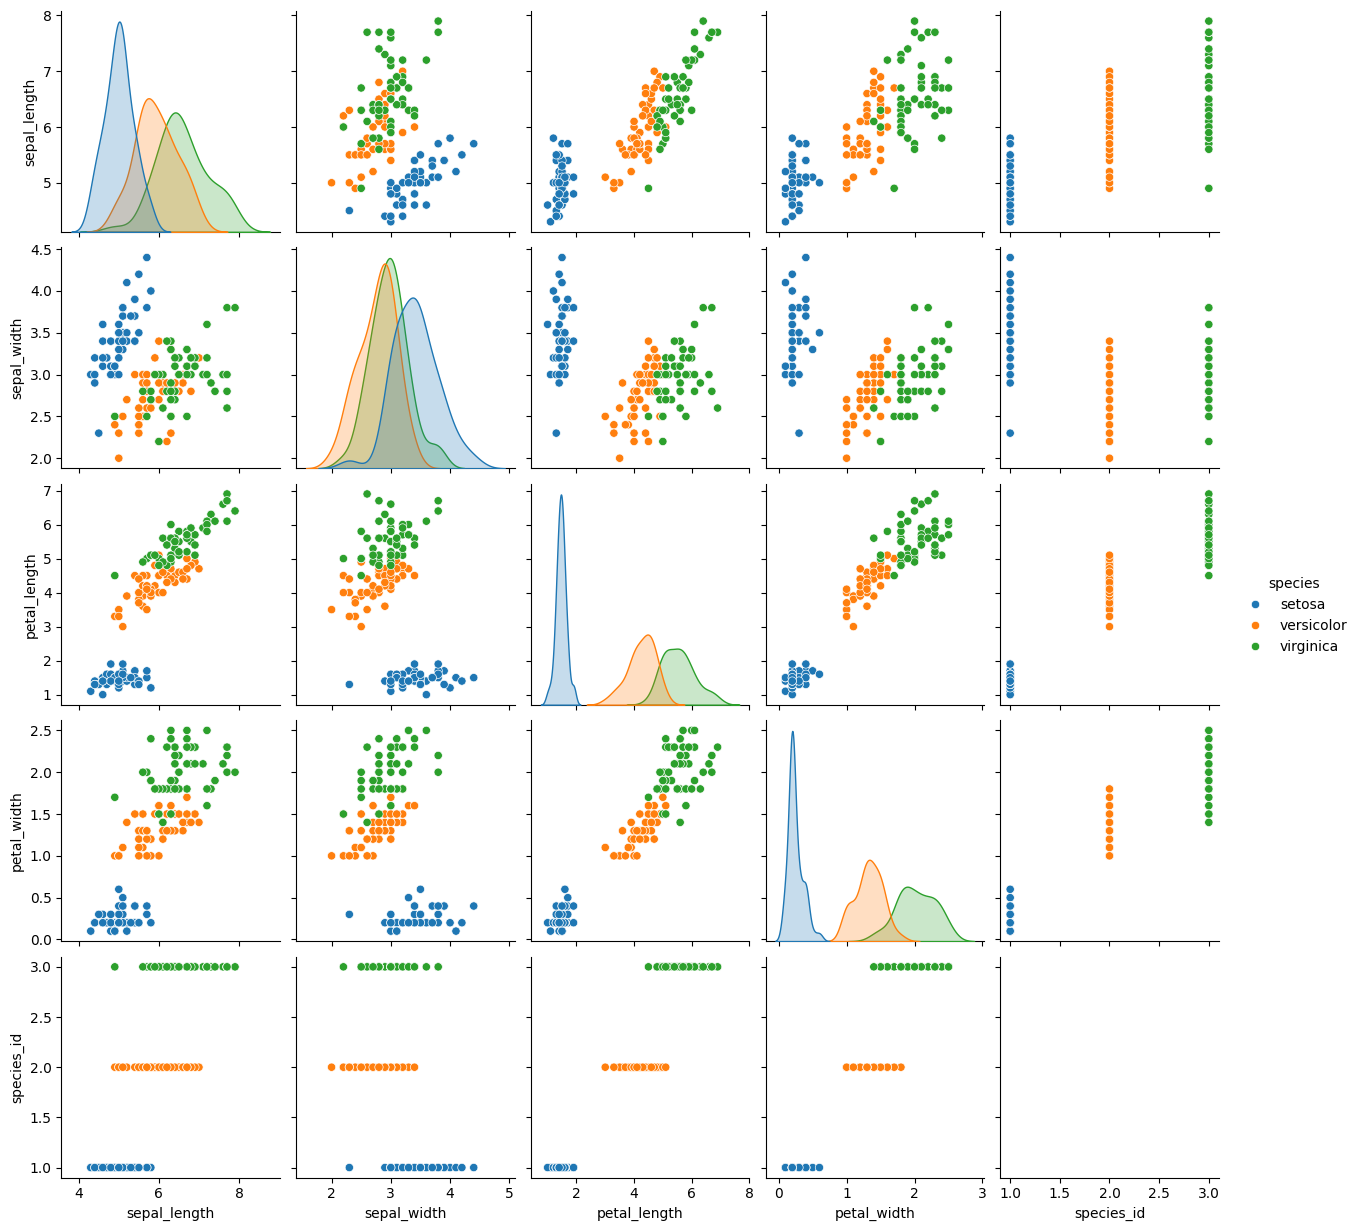

In [58]:
sns.pairplot(iris_data,hue='species')

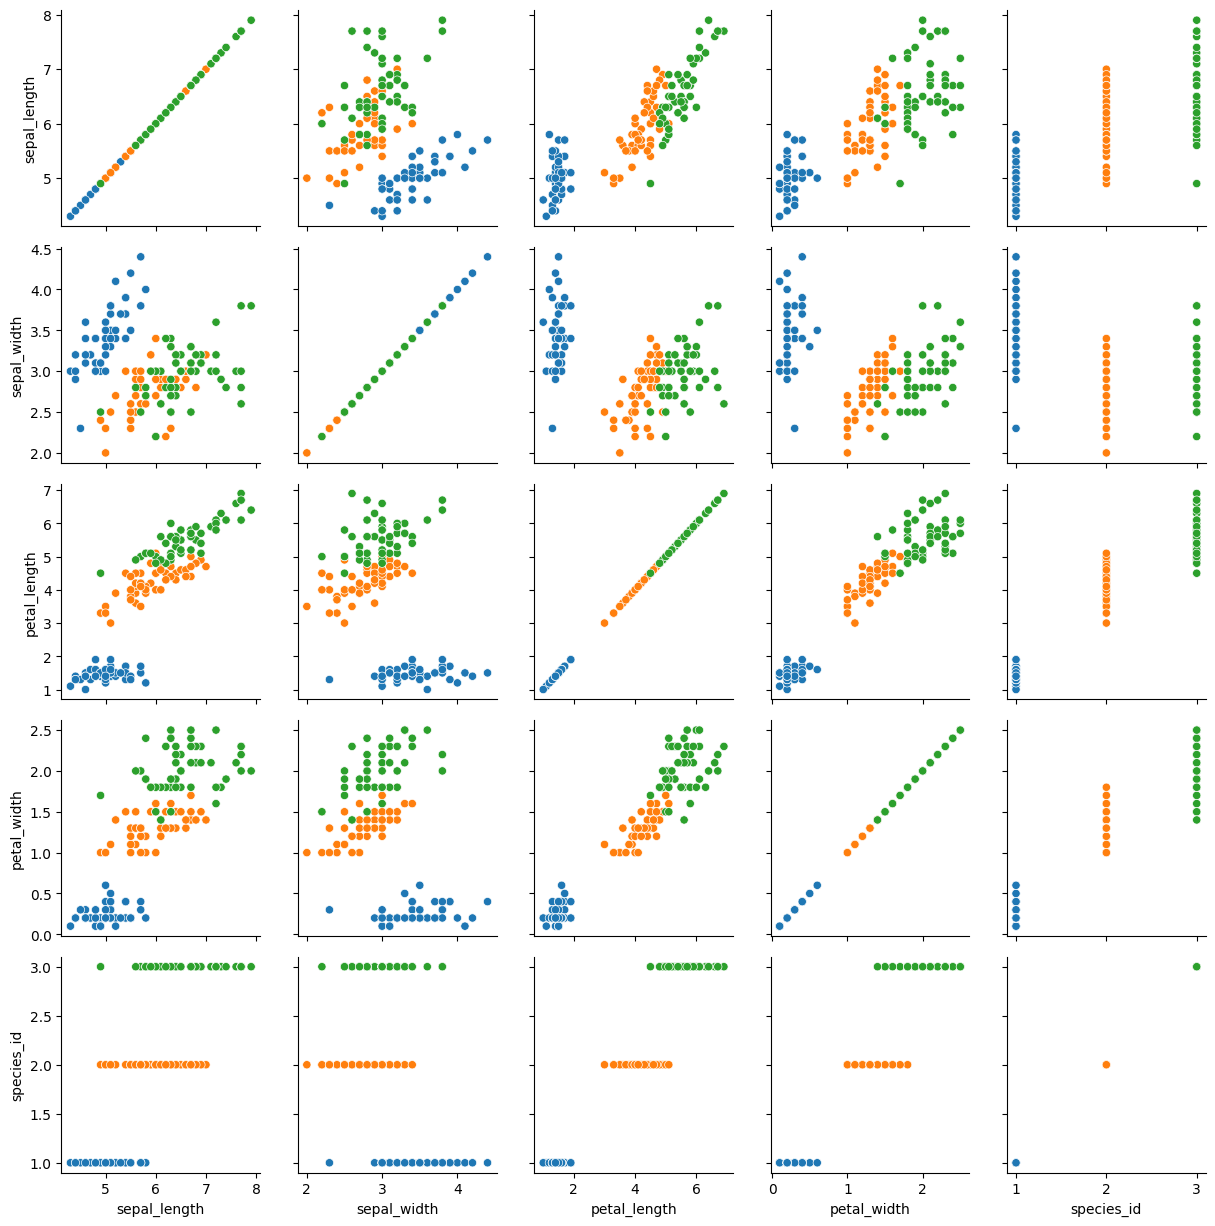

In [59]:
g = sns.PairGrid(data=iris_data,hue='species')
g.map(sns.scatterplot)

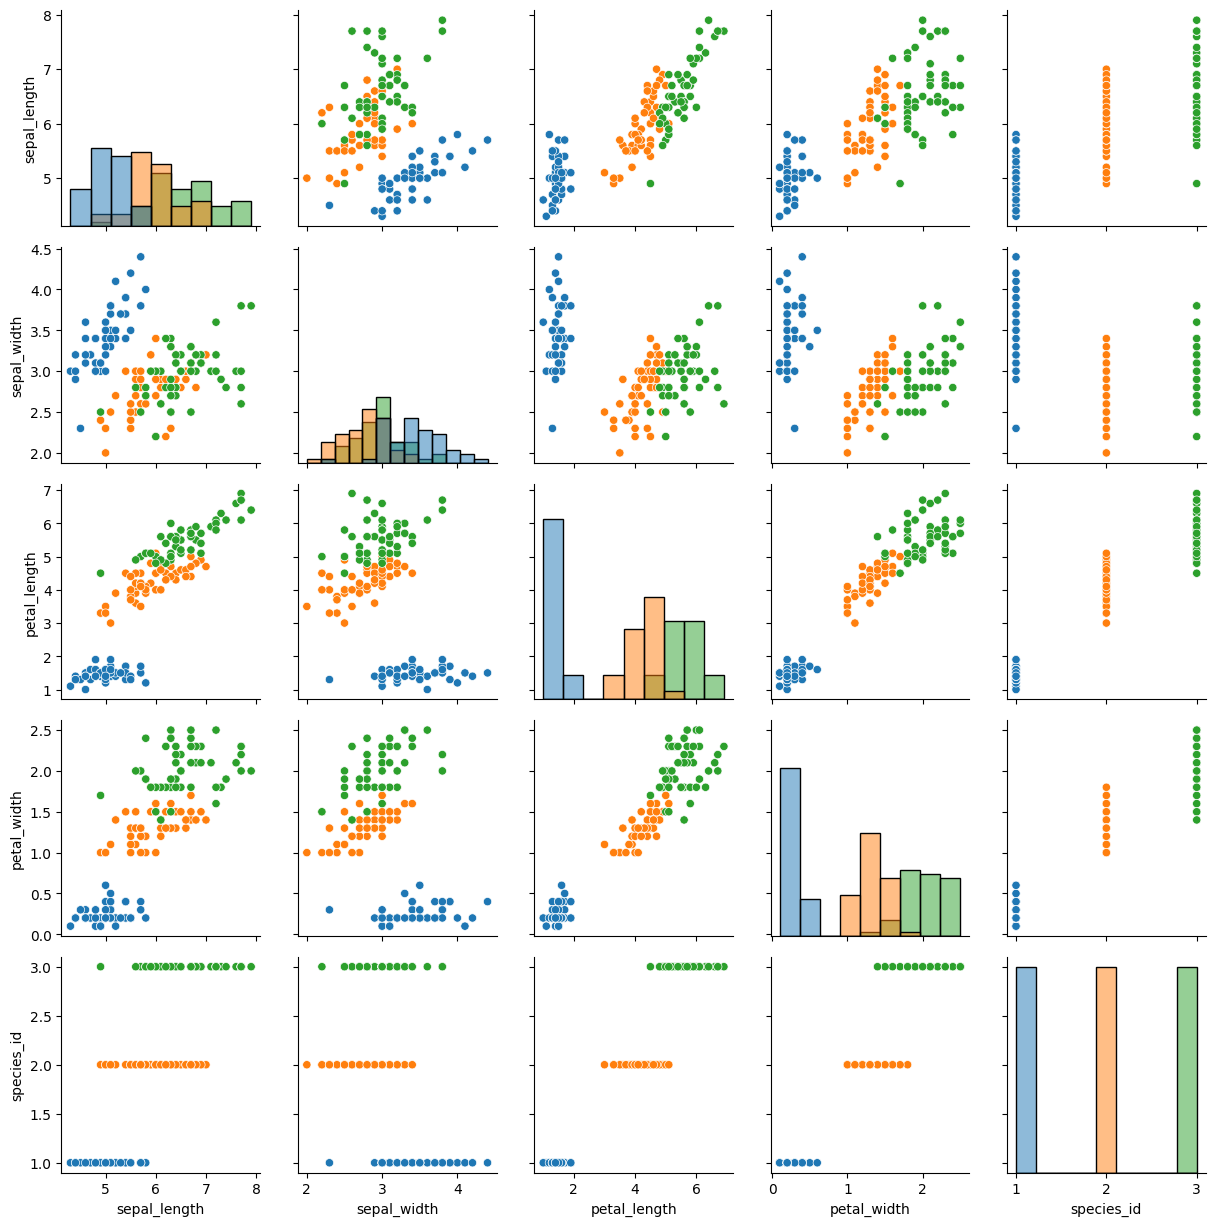

In [60]:
g = sns.PairGrid(data=iris_data,hue='species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [61]:
# Doubt
#g = sns.PairGrid(data=iris_data,hue='species')
#g.map_diag(sns.histplot)
#g.map_upper(sns.kdeplot)
#g.map_lower(sns.scatterplot)

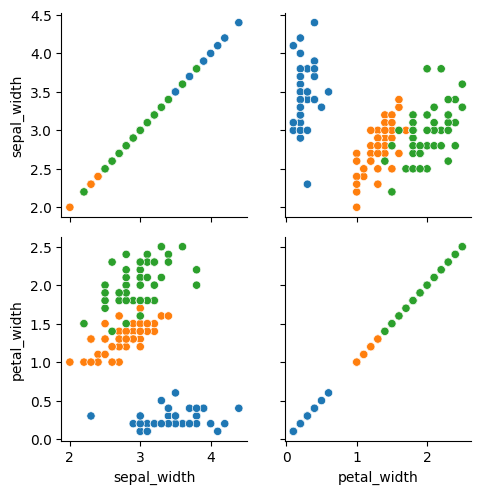

In [62]:
g = sns.PairGrid(data=iris_data,hue='species',vars=['sepal_width','petal_width'])
g.map(sns.scatterplot)

# Joint Plot And Joint Grid

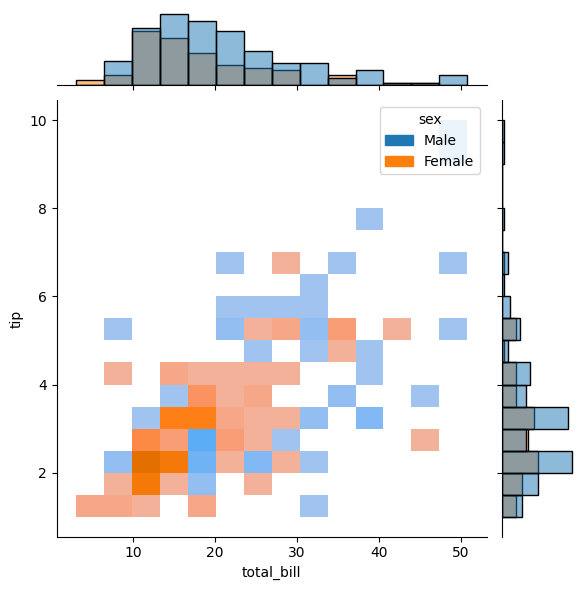

In [63]:
# kind = kde,scatter,hist,reg
# axis level func.
sns.jointplot(data=tips_data,x='total_bill',y='tip',kind='hist',hue='sex')

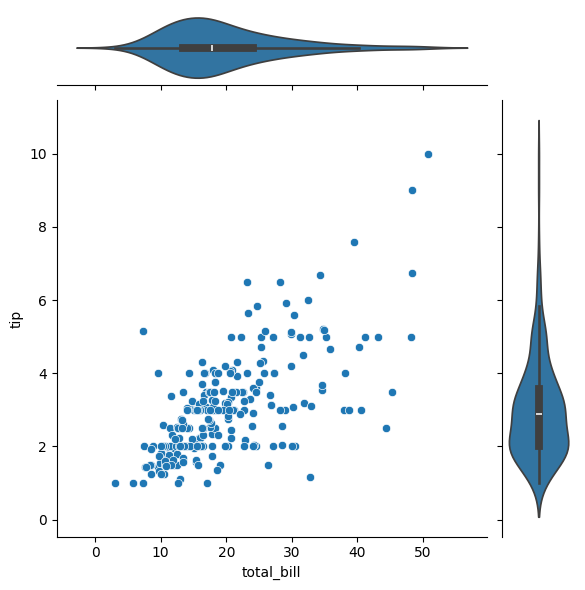

In [64]:
g = sns.JointGrid(data=tips_data,x='total_bill',y='tip')
g.plot(sns.scatterplot,sns.violinplot)

# Utility functions

In [65]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [17]:
titanic_data = sns.load_dataset('titanic')